### PCA

In [1]:
import numpy as np

In [3]:
mean = [20, 20]
cov = [[5,0], [25, 25]]
x,y = np.random.multivariate_normal(mean, cov, 1000).T

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Text(0,0.5,'feature 2')

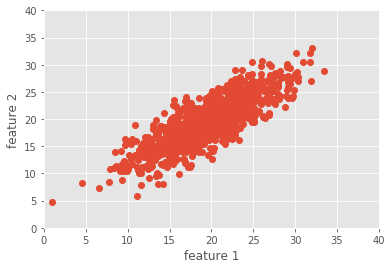

In [11]:
# 다중 변수 가우시안 데이터
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [19]:
X = np.vstack((x,y)).T

In [24]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
# 투영 전에 평균값을 뺀 값 (mean), 공분산 행렬의 고유 벡터(eig) 반환.

In [26]:
eig

array([[ 0.7262532,  0.6874273],
       [-0.6874273,  0.7262532]])

Text(0,0.5,'feature 2')

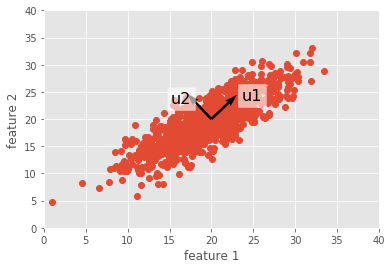

In [36]:
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:,0], eig[:,1], zorder=3, scale=0.2, units='xy')

plt.text(mean[0] + 5 * eig[0,0], mean[1] + 5 * eig[0,1], 'u1', zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1,0], mean[1] + 4 * eig[1,1], 'u2', zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))

plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [38]:
X2 = cv2.PCAProject(X, mu, eig)

[-20, 20, -10, 10]

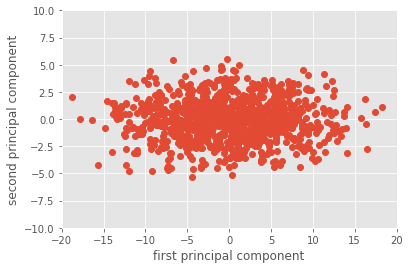

In [40]:
plt.plot(X2[:,0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

### ICA
ICA (Independent Component Analysis, 독립 성분 분석)

In [42]:
from sklearn import decomposition
ica = decomposition.FastICA()

In [44]:
X2 = ica.fit_transform(X)

[-0.2, 0.2, -0.2, 0.2]

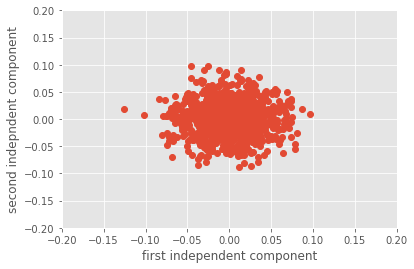

In [47]:
plt.plot(X2[:,0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second indepndent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

### NMF
Non-Negative Matrix Factorization

In [49]:
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)

[-5, 15, -5, 15]

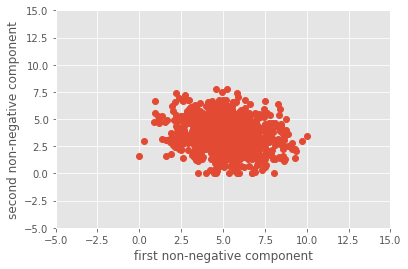

In [53]:
plt.plot(X2[:,0], X2[:,1],'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([-5, 15, -5, 15])